# Enunciado

In [39]:
%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
import numpy as np

## Preparación de datos (1.0pt)

Explore el archivo `covid19_confirmados.csv` y utilice la función `pd.read_csv` para importarlo como un `DataFrame` considerando las siguientes indicaciones:

1. Utilice el nombre de país como índice.
1. Elimine las columnas `Lat` y `Long`.
1. Use TimeStamps para las columnas asociadas a fechas.
1. Reduzca la columna `Province/State`. El DataFrame resultante debe tener los totales a nivel país.

In [40]:
def crea_dataframe(data): #data -> ruta del archivo
    #creacion dataframe, elimina columnas Lat y Long 
    df = pd.read_csv(data,index_col="Country/Region",parse_dates=True).drop(["Lat","Long"],axis=1)

    #reduce la columna province/state con un groupby manteniendo los totales por pais
    df = df.groupby(level=0).sum(numeric_only=True)

    #parsear fechas
    fechas = []
    for i in df.columns:
        fechas.append(pd.to_datetime(i)) #añade a una lista la transformacion a timestamp de cada fecha
    df.columns = fechas #asigna a columnas la lista de fechas parseadas a timestamp

    return df
        

In [41]:
df_confirmados = crea_dataframe("data/covid19_confirmados.csv") #creacion del df
df_confirmados

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,177782,177803,177827,177897,177932,177974,177974,177974,177974,177974
Albania,0,0,0,0,0,0,0,0,0,0,...,273759,273823,273870,273913,274000,274055,274108,274136,274191,274219
Algeria,0,0,0,0,0,0,0,0,0,0,...,265679,265684,265691,265694,265699,265705,265707,265714,265720,265724
Andorra,0,0,0,0,0,0,0,0,0,0,...,40024,40024,40024,40024,40024,40024,40328,40328,40328,40328
Angola,0,0,0,0,0,0,0,0,0,0,...,99194,99194,99194,99194,99194,99194,99194,99194,99194,99194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,655750,655750,655750,656287,656287,656287,656287,656287,656287,656287
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
Yemen,0,0,0,0,0,0,0,0,0,0,...,11806,11806,11806,11808,11812,11812,11812,11812,11813,11813


Explore el archivo `population_by_country_2020.csv` y utilice la función `pd.read_csv` de pandas para importarlo como un `DataFrame`. Utilice el nombre de país como índice principal. 

Nota: Algunos siglas o nombres podrían no calzar con el `DataFrame` anterior, explore y corrija programaticamente dichos errores.

In [42]:
df_population = pd.read_csv("data/poblacion_mundial2020.csv") #dataframe de population
df_population.rename(columns={"Country (or dependency)":"Country/Region"}, inplace=True) #Cambio del nombre de el indice de la columna
df_population.set_index("Country/Region",inplace=True) #asignacion de "nuevo" nombre

Realice un `merge` de los `DataFrame` anteriores. El objetivo es asignar un valor de `Population` a cada elemento del primer `DataFrame`. Indique las filas donde no se puede realizar el `merge` y luego descártelas de su `DataFrame` final.

In [43]:
def eliminar_error(df,df_population):
    valores_error = []
    for pais in df.index:
        if pais not in df_population.index:
            valores_error.append(pais)
            df.drop(labels=pais, axis=0, inplace=True)
    # display("Los siguientes datos NO se encuentran en population: ",valores_error) #descomentar esta linea para verificar los paises con errores

In [44]:
error = ['Antarctica', #no existen datos en poblacion_mundial
 'Burma', #el nombre es Myanmar en poblacion_mundial
 'Congo (Brazzaville)', #pais de africa central: Congo -> conocido como Congo brazzaville
 'Congo (Kinshasa)', #nombre R.D Congo
 "Cote d'Ivoire", #error semantico Côte d'Ivoire, cambiar a Cote d'Ivoire
 'Czechia', #diferente nombre (Czech Republic (Czechia)) cambiar a Czechia
 'Diamond Princess', #no es un pais?
 'Korea, South', #correccion a South Korea
 'Kosovo', #no existen datos en poblacion_mundial
 'MS Zaandam', #no es un pais?
 'Saint Kitts and Nevis', #error semantico en poblacion mundial el and estaba representado por un &
 'Saint Vincent and the Grenadines', #cambio de nombre St. Vincent & Grenadines -> Saint Vincent and the Grenadines
 'Sao Tome and Principe', #Sao Tome & Principe cambiar el & por and
 'Summer Olympics 2020', #no es pais
 'Taiwan*', #correccion del simbolo *
 'US', #cambio en archivos covid19_  a united states 
 'West Bank and Gaza', #no existen datos en poblacion mundial
 'Winter Olympics 2022'] #no es un pais

In [45]:
eliminar_error(df_confirmados,df_population)
df_confirmados = pd.merge(df_confirmados,df_population, on="Country/Region")
display(df_confirmados)


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,2,2,2,2,2,2,2,2,2,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


Repita el procedimiento para los archivos `covid19_recuperados.csv` y `covid19_muertes.csv`.

In [46]:
#creacion de siguientes dataframe y merge con population
df_recuperados = crea_dataframe("data/covid19_recuperados.csv") #creacion del df
eliminar_error(df_recuperados,df_population)
df_recuperados = pd.merge(df_recuperados,df_population, on="Country/Region") #merge

df_muertes = crea_dataframe("data/covid19_muertes.csv") #creacion del df
eliminar_error(df_muertes,df_population)
df_muertes = pd.merge(df_muertes,df_population, on="Country/Region") #merge

display(df_recuperados)
display(df_muertes)

,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,...,Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,39074280,2.33 %,886592,60,652860,-62920.0,4.6,18,25 %,0.50 %
Albania,0,0,0,0,0,0,0,0,0,0,...,2877239,-0.11 %,-3120,105,27400,-14000.0,1.6,36,63 %,0.04 %
Algeria,0,0,0,0,0,0,0,0,0,0,...,43984569,1.85 %,797990,18,2381740,-10000.0,3.1,29,73 %,0.56 %
Andorra,0,0,0,0,0,0,0,0,0,0,...,77287,0.16 %,123,164,470,NaN,N.A.,N.A.,88 %,0.00 %
Angola,0,0,0,0,0,0,0,0,0,0,...,33032075,3.27 %,1040977,26,1246700,6413.0,5.6,17,67 %,0.42 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,28421581,-0.28 %,-79889,32,882050,-653249.0,2.3,30,N.A.,0.36 %
Vietnam,0,0,0,0,0,0,0,0,0,0,...,97490013,0.91 %,876473,314,310070,-80000.0,2.1,32,38 %,1.25 %
Yemen,0,0,0,0,0,0,0,0,0,0,...,29935468,2.28 %,664042,56,527970,-30000.0,3.8,20,38 %,0.38 %


## Análisis global (1.5pt)

Escriba una función que reciba una fecha y que retorne las siguientes series: 

1. Tasa de incidencia: Casos confirmados por 100.000 dividido población total.
1. Tasa de recuperación: Casos recuperados por 100.000 dividido población total.
1. Tasa de mortalidad: Casos decesos por 100.000 dividido población total.

Ahora, considerando los siguientes dos puntos temporales:

- 22 de Enero de 2021.
- 22 de Enero de 2022.

Muestre los nombres y los valores de los 3 países con:

1. La mayor y menor tasa de incidencia, respectivamente.
1. La mayor y menor tasa de recuperación, respectivamente.
1. La mayor y menor tasa de mortalidad, respectivamente.

Muestre también la posición de Chile en el ranking.

In [47]:
def series_fecha(fecha):
    tasa_incidencia = (df_confirmados[fecha]*100000)/df_confirmados["Population (2020)"]
    tasa_recuperacion = (df_recuperados[fecha]*100000)/df_recuperados["Population (2020)"]
    tasa_mortalidad = (df_muertes[fecha]*100000)/df_muertes["Population (2020)"]

    dicc_series = {"tasa incidencias":tasa_incidencia,
                    "tasa recuperacion": tasa_recuperacion,
                    "tasa mortalidad": tasa_mortalidad
                    }
    return dicc_series


In [48]:
#analsis de fechas 22 de Enero de 2021 y 22 de Enero de 2022
fecha1 = series_fecha(pd.to_datetime("2021-01-22"))
fecha2 = series_fecha(pd.to_datetime("2022-01-22"))

# display(fecha1["tasa mortalidad"]) #acceder a los datos especificos del diccionario

In [49]:
def serie_min_max(df,tipo):
    #mayor
    df_max = (pd.DataFrame(df[tipo]).set_axis([tipo],axis=1).sort_values(tipo,ascending=False)).head(3)
    df_max.insert(1,"rank",df_max.rank(ascending=False))
    
    chile1 = (pd.DataFrame(df[tipo]).set_axis([tipo],axis=1).sort_values(tipo,ascending=False))
    chile1.insert(1,"rank",chile1.rank(ascending=False))

    #menor
    df_min = (pd.DataFrame(df[tipo]).set_axis([tipo],axis=1).sort_values(tipo,ascending=True)).head(3)
    df_min.insert(1,"rank",df_min.rank(ascending=True))

    display(df_max,pd.DataFrame(chile1.loc["Chile"]),df_min)
    print()

In [50]:
display("La mayor y menor tasa de incidencia, respectivamente.")
print("fecha 1:")
serie_min_max(fecha1,"tasa incidencias")
print("fecha 2: ")
serie_min_max(fecha2,"tasa incidencias")

display("La mayor y menor tasa de recuperación, respectivamente.")
print("fecha 1: ")
serie_min_max(fecha1,"tasa recuperacion")
print("fecha 2: ")
serie_min_max(fecha2,"tasa recuperacion")

display("La mayor y menor tasa de mortalidad, respectivamente.")
print("fecha 1: ")
serie_min_max(fecha1,"tasa mortalidad")
print("fecha 2: ")
serie_min_max(fecha2,"tasa mortalidad")


'La mayor y menor tasa de incidencia, respectivamente.'

fecha 1:


,tasa incidencias,rank
Country/Region,,
Andorra,12183.161463,1.0
Montenegro,9152.018851,2.0
Czechia,8633.359536,3.0


,Chile
tasa incidencias,3604.493276
rank,43.000000


,tasa incidencias,rank
Country/Region,,
Kiribati,0.0,2.0
Palau,0.0,2.0
Tonga,0.0,2.0



fecha 2: 


,tasa incidencias,rank
Country/Region,,
Andorra,42730.342748,1.0
Seychelles,34907.011467,2.0
San Marino,33779.165685,3.0


,Chile
tasa incidencias,10183.939549
rank,63.000000


,tasa incidencias,rank
Country/Region,,
Micronesia,0.867822,1.0
Tonga,0.944278,2.0
Vanuatu,2.270243,3.0


'La mayor y menor tasa de recuperación, respectivamente.'

fecha 1: 


,tasa recuperacion,rank
Country/Region,,
Andorra,11045.842121,1.0
Montenegro,7733.250541,2.0
San Marino,7650.836672,3.0


,Chile
tasa recuperacion,3369.278186
rank,25.000000


,tasa recuperacion,rank
Country/Region,,
Serbia,0.0,2.0
Palau,0.0,2.0
Kiribati,0.0,2.0



fecha 2: 


,tasa recuperacion,rank
Country/Region,,
Afghanistan,0.0,2.0
Panama,0.0,2.0
New Zealand,0.0,2.0


,Chile
tasa recuperacion,0.0
rank,96.0


,tasa recuperacion,rank
Country/Region,,
Afghanistan,0.0,2.0
Netherlands,0.0,2.0
New Zealand,0.0,2.0


'La mayor y menor tasa de mortalidad, respectivamente.'

fecha 1: 


,tasa mortalidad,rank
Country/Region,,
Peru,299.441356,1.0
San Marino,191.491869,2.0
Belgium,178.256562,3.0


,Chile
tasa mortalidad,92.903458
rank,29.000000


,tasa mortalidad,rank
Country/Region,,
Tonga,0.0,2.0
Saint Kitts and Nevis,0.0,2.0
Palau,0.0,2.0



fecha 2: 


,tasa mortalidad,rank
Country/Region,,
Peru,617.669279,1.0
Bulgaria,470.325916,2.0
Bosnia and Herzegovina,426.711974,3.0


,Chile
tasa mortalidad,206.308775
rank,34.000000


,tasa mortalidad,rank
Country/Region,,
Marshall Islands,0.0,2.0
Micronesia,0.0,2.0
Kiribati,0.0,2.0


#

Ahora realice las siguientes gráficas de nube de punto

- Tasa de incidencia Enero 2021 versus Tasa de incidencia Enero 2022.
- Tasa de mortalidad Enero 2021 versus Tasa de incidencia Enero 2022.

En cada una:

- Utilice color para demarcar el [continente](https://www.kaggle.com/datasets/statchaitya/country-to-continent) de cada país.
- Realice una anotación con el código del pais cercano a su punto: https://country-code.cl/es/.
- Utilice un tamaño relativamente más grande para Chile.
- Considere las buenas prácticas vistas en clases.

In [51]:
#Continentes y codigo ISO2 archivo generado con chatgpt
continentes = pd.read_csv("data/pais_cod_continente.csv",index_col="Country/Region")

df_confirmados = pd.merge(df_confirmados,continentes,on="Country/Region")
df_recuperados = pd.merge(df_recuperados,continentes,on="Country/Region")
df_muertes = pd.merge(df_muertes,continentes,on="Country/Region")

# display(continentes)

In [52]:
#Verificacion de la informacion de los dataframe
# display(df_confirmados)
# display(df_recuperados)
# display(df_muertes)

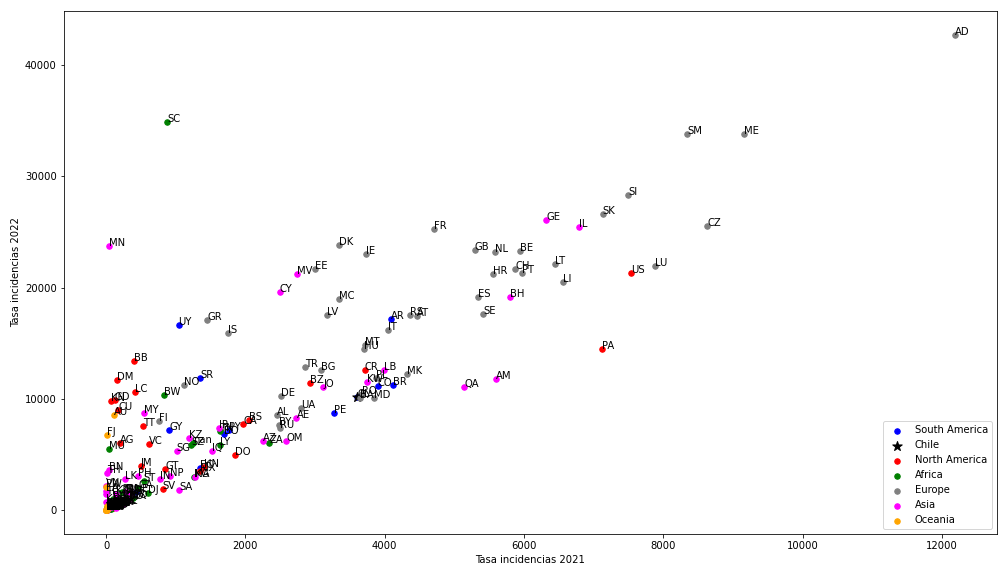

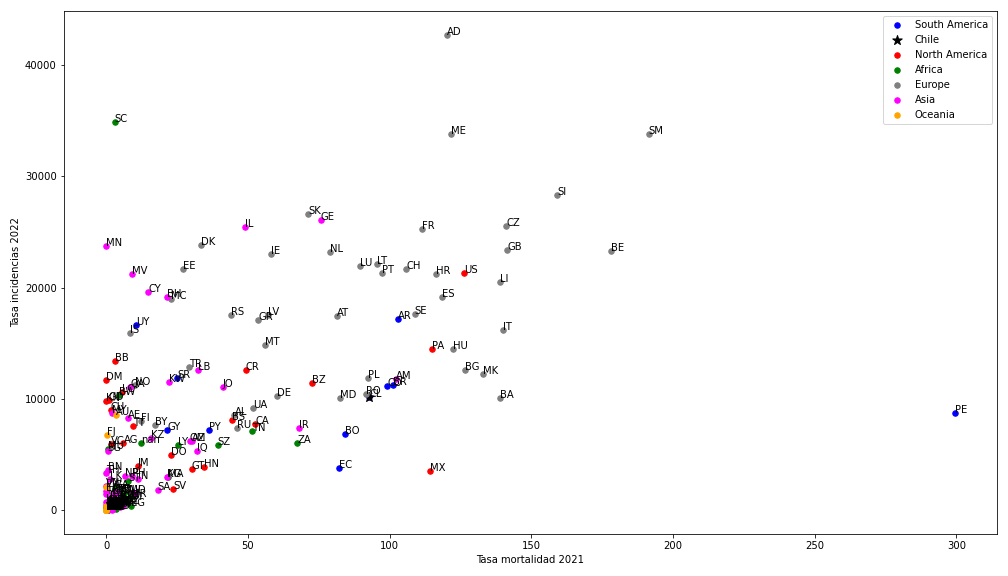

In [62]:
#nube de puntos

############################################## LISTO ##############################################
##convertir a funcion entregar 2 dataframe y operar para realizar los graficos#####################
def nube_puntos(df1,df2,t1,t2):
    df_1 = df1.copy()
    df_2 = df2.copy()

    df_1.reset_index(level=0, inplace=True)
    df_1.set_index(["Continent","Country/Region"],inplace=True,drop=True)
    df_2.reset_index(level=0, inplace=True)
    df_2.set_index(["Continent","Country/Region"],inplace=True,drop=True)

    df_c1 = df_1.copy()
    df_c2 = df_2.copy()

    continentes_lista = {"South America":"blue",
                        "North America":"Red",
                        "Africa":"Green",
                        "Europe":"Grey",
                        "Asia":"magenta",
                        "Oceania":"orange"}

    fig, ax = plt.subplots(figsize=(14, 8), 
                       sharex=False, sharey=False, tight_layout=True)
    
    for i, etiqueta in enumerate(continentes_lista):
        # display(i,continentes_lista[etiqueta],etiqueta)
        
        #Calculo de tasas 
        for j in df_1.loc[etiqueta,pd.to_datetime("2021-01-22"): pd.to_datetime("2021-01-22")]:
            df_c1.loc[etiqueta, [j]] = (df_1[j]*100000)/df_1["Population (2020)"]
            

        for j in df_2.loc[etiqueta, pd.to_datetime("2022-01-22"): pd.to_datetime("2022-01-22")]:
            df_c2.loc[etiqueta, [j]] = (df_2[j]*100000)/df_2["Population (2020)"]
        

        ax.scatter(x=df_c1.loc[etiqueta, pd.to_datetime("2021-01-22"): pd.to_datetime("2021-01-22")],
                    y= df_c2.loc[etiqueta, pd.to_datetime("2022-01-22"): pd.to_datetime("2022-01-22")],
                    s=30,marker='o',color=continentes_lista[etiqueta],label=etiqueta)
        

        if(etiqueta == "South America"):
            ax.scatter(x=df_c1.loc[("South America","Chile"),pd.to_datetime("2021-01-22"): pd.to_datetime("2021-01-22")],
                       y= df_c2.loc[("South America","Chile"),pd.to_datetime("2022-01-22"): pd.to_datetime("2022-01-22")],
                       s=150,marker='*',color="BLACK",label="Chile")
        ax.set_xlabel(t1)
        ax.set_ylabel(t2)

    #Etiqueta a cada elemento
    for i in df_c1.index:
        ax.annotate(df_c1.loc[(i[0],i[1]),"ISO2"], 
                    xy=(df_c1.loc[(i[0],i[1]),pd.to_datetime("2021-01-22"): pd.to_datetime("2021-01-22")],
                    df_c2.loc[(i[0],i[1]),pd.to_datetime("2022-01-22"): pd.to_datetime("2022-01-22")]));
        
 
    ax.legend()
        

nube_puntos(df_confirmados,df_confirmados,"Tasa incidencias 2021","Tasa incidencias 2022")
nube_puntos(df_muertes,df_confirmados,"Tasa mortalidad 2021","Tasa incidencias 2022")


En base a los rankings y gráficas de nube de punto analice y discuta sobre el caso de Chile considerando las siguientes preguntas guía:

- ¿A qué países del mundo se parece más?
- ¿A qué países de América Latina se parece más?
- ¿A qué países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos) se parece más? 


## Análisis comparativo (1.5pt)

Construya una interfaz gráfica usando `ipywidgets` y `matplotlib` que permita realizar comparaciones entre las series de tiempo de COVID-19 de dos países seleccionados arbitrariamente. A modo de simplificación considere sólo los países de la [OCDE](https://es.wikipedia.org/wiki/Organizaci%C3%B3n_para_la_Cooperaci%C3%B3n_y_el_Desarrollo_Econ%C3%B3micos). 

Requerimientos:

1. La interfaz debe incluir controles para escoger dos países a partir de una lista.
1. La interfaz debe incluir tres [tabs](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html#Tabs), el primero debe mostrar las series de tiempo de ambos países de los casos confirmados, el segundo la de recuperados y el tercero la de los decesos, respectivamente. Use una leyenda para indicar el nombre de los países.
1. La interfaz debe tener un control que permita escoger entre casos acumulados y casos nuevos. Hint: Para los casos nuevos pueden revisar la función [`diff`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html).
1. La interfaz debe tener un control que permita escoger entre valores absolutos y valores relativos (tasas por 100.000 habitantes).
1. La interfaz debe tener un control que permita escoger entre valores diarios y valores semanales. Para esto último se recomienda usar `groupby` con una [frecuencia lunes a lunes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets).
    



In [54]:
#dataframe de paises OCDE -> datos obtenidos con chatgpt
df_OCDE_confirmados = pd.read_csv("data/paises_OCDE.csv",index_col="Country/Region")
df_OCDE_confirmados = pd.merge(df_confirmados,df_OCDE_confirmados,on="Country/Region")

df_OCDE_recuperados= pd.read_csv("data/paises_OCDE.csv",index_col="Country/Region")
df_OCDE_recuperados = pd.merge(df_recuperados,df_OCDE_recuperados,on="Country/Region")

df_OCDE_muertes = pd.read_csv("data/paises_OCDE.csv",index_col="Country/Region")
df_OCDE_muertes = pd.merge(df_muertes,df_OCDE_muertes,on="Country/Region")

# display(df_OCDE_confirmados)
# display(df_OCDE_recuperados)
# display(df_OCDE_muertes)

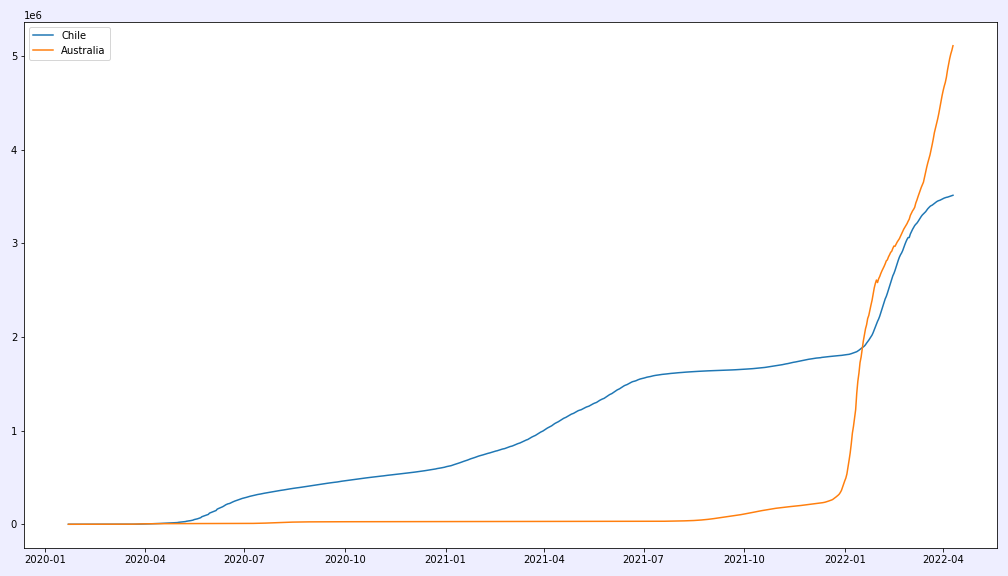

In [55]:
dataframes_OCDE = {0: df_OCDE_confirmados,
                   1: df_OCDE_recuperados,
                   2: df_OCDE_muertes} #ayuda a acceder al df de forma mas facil

def crear_grafico(): #crea el grafico dentro de cada hijo de la tabla
    for i in range(3):
        with tabla.children[i]:
            fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True, facecolor='#EEF')

            line, = ax.plot(dataframes_OCDE[i].loc[pais1.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")],label=pais1.value)
            line2, = ax.plot(dataframes_OCDE[i].loc[pais2.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")], label=pais2.value)
            plt.legend()
            plt.show()

def boton_presionado(dato): #actualiza los valores del grafico
    with output:
        line.set_ydata(dataframes_OCDE[0].loc[pais1.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")])
        line.set_label(pais1.value)
        line2.set_ydata(dataframes_OCDE[0].loc[pais2.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")])
        line2.set_label(pais2.value)
        plt.legend()


# implementacion de botones y tabla

pais1 = widgets.Dropdown(
    value='Chile', 
    options=df_OCDE_confirmados.index, 
    description='Pais 1'
)

pais2 = widgets.Dropdown( 
    options=df_OCDE_confirmados.index, 
    description='Pais 2'
)

confirmar = widgets.Button(description='confirmar paises')

datos_tabla = ["Tasa incidencias", "Tasa recuperados","Tasa mortalidad"]
tabla = widgets.Tab()
tabla.children = [widgets.Output() for i in range(len(datos_tabla))]
for i in range(len(datos_tabla)):
    tabla.set_title(i,datos_tabla[i])


output = widgets.Output()
display(widgets.HBox([pais1,pais2,confirmar,output]))

###################################################################################################################

#realizar el funcionamiento de los grafico 

#implementar esto dentro de cada hijo de la tabla


fig, ax = plt.subplots(figsize=(14, 8), tight_layout=True, facecolor='#EEF')

line, = ax.plot(dataframes_OCDE[0].loc[pais1.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")],label=pais1.value)
line2, = ax.plot(dataframes_OCDE[0].loc[pais2.value, pd.to_datetime("2020-01-22"): pd.to_datetime("2022-04-10")], label=pais2.value)
plt.legend()

crear_grafico()
confirmar.on_click(boton_presionado)

display(tabla)


## Dashboard interactivo (1.0pt)

Implemente un *dashboard web* interactivo a partir de la interfaz desarrollada en el punto anterior utilizando la librería [voila](https://github.com/voila-dashboards/voila). Sirva su interfaz en la nube, para esto puede considerar los servicios gratuitos [binder](https://mybinder.org/) o [heroku](https://www.heroku.com/free). Revise la documentación de voila [con respecto a *deployment* en la nube](https://voila.readthedocs.io/en/stable/deploy.html) y este repositorio con [un ejemplo en base a heroku](https://github.com/voila-dashboards/voila-heroku). 

Escriba el link de su dashboard web a continuación:

## Discusión final (1.0pt)

En base a su interfaz:   

1. Describa en detalle la situación de Chile con respecto a la evolución temporal de las series de tiempo. Destaque patrones y comportamientos que considere relevantes. Compare lo que observa en las distintas series de tiempo. 
1. Considerando la evolución a nivel de semana, conteste ¿En qué fechas ocurre un aumento o disminución notoria de los casos? ¿En qué fechas hay máximos y mínimos?
1. Considerando métricas que sean relativas compare el caso de Chile contra cinco países de la OCDE seleccionados por ustedes. Destaque semejanzas y diferencias considerando las cantidades y los posibles desfases temporales existentes.